In [1]:
import numpy as np
import matplotlib
#matplotlib.use('nbagg') #efforts to zoom --2 (matplotlib plots)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function
import itertools
#efforts to zoom--1
# import mpld3 # this is very slowwww 
# mpld3.enable_notebook()

%matplotlib inline

In [2]:
%run ./importWalkingDataConfidence.ipynb

Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)


In [3]:
def get_input_fn(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL_WTS}),
      y = pd.DataFrame(data_y[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [4]:
LABEL_ID = 0;
LABEL = EMOSCORES[LABEL_ID]
WT_COL = WTS_LABEL[LABEL_ID]

In [5]:
embedded_ffp_column = tf.contrib.layers.embedding_column(
    tf.contrib.layers.sparse_column_with_integerized_feature("FFPType", 7, combiner=None, dtype=tf.int64), dimension = 7)
# Continuous columns- frontKneesAngle	rearKneesAngle	frontAnkle	rearAnkle	frontHipsAngle
bodyZ = tf.feature_column.numeric_column("bodyAngleZ")
frontK = tf.feature_column.numeric_column("frontKneesAngle")
rearK = tf.feature_column.numeric_column("rearKneesAngle")
frontA = tf.feature_column.numeric_column("frontAnkle")
rearA = tf.feature_column.numeric_column("rearAnkle")
frontH = tf.feature_column.numeric_column("frontHipsAngle")
rearH = tf.feature_column.numeric_column("rearHipsAngle")
swingFtHt = tf.feature_column.numeric_column("swingFtHeight")
speed = tf.feature_column.numeric_column("speed")
gaitTime = tf.feature_column.numeric_column("gaitDuration")

feature_cols = [bodyZ, frontK, rearK, frontA, rearA, frontH, rearH, swingFtHt, speed, gaitTime, embedded_ffp_column]
lin_feature_cols = [bodyZ, swingFtHt, speed, gaitTime]

In [6]:
# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionELU", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1, activation_fn = tf.nn.elu)

# regressor = tf.contrib.learn.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionConfidenceRELU", weight_column_name = WT_COL,
#     optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)

# regressor = tf.contrib.learn.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionConfidenceRELUDropout04EarlyStop", weight_column_name = WT_COL,
#     optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.4,config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1))

#model_dir_name="/DNN/quadMotionConfidenceSoftplus1Layer10UnitsEarlyStopLearnRate01"
# model_dir_name="/DNN/quadMotionConfidenceSoftplus1Layer10UnitsEarlyStop"
# regressor = tf.contrib.learn.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[10],  model_dir=model_dir_name, weight_column_name = WT_COL,
#     optimizer = tf.train.AdamOptimizer(learning_rate=0.001), config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1), activation_fn = tf.nn.softplus)


# Build a wide + deep model
model_dir_name="/DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001"

# regressor = tf.contrib.learn.DNNLinearCombinedRegressor(linear_feature_columns = lin_feature_cols,
#   dnn_feature_columns=feature_cols, dnn_hidden_units=[1000],  model_dir=model_dir_name, weight_column_name = WT_COL,
#     dnn_optimizer = tf.train.AdamOptimizer(
#       learning_rate=0.01), dnn_dropout =0.1, config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1), dnn_activation_fn = tf.nn.softplus)

regressor = tf.contrib.learn.DNNLinearCombinedRegressor(linear_feature_columns = lin_feature_cols,
  dnn_feature_columns=feature_cols, dnn_hidden_units=[10,10],  model_dir=model_dir_name, weight_column_name = WT_COL,
    dnn_optimizer = tf.train.AdamOptimizer(
      learning_rate=0.001), dnn_dropout =0.1, config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1), dnn_activation_fn = tf.nn.softplus)

Instructions for updating:
Please set fix_global_step_increment_bug=True and update training steps in your pipeline. See pydoc for details.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_log_step_count_steps': 100, '_task_type': None, '_model_dir': '/DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001', '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_environment': 'local', '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F0C8935160>, '_task_id': 0, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 1, '_save_summary_steps': 100, '_num_ps_replicas': 0}


In [7]:
 ev = regressor.evaluate(
     input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
print('MSE (tensorflow): {0:f}'.format(ev['loss']))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-10-03-15:19:16


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 986, in emit
    msg = self.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 836, in format
    return fmt.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 573, in format
    record.message = record.getMessage()
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 336, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _ru

INFO:tensorflow:Restoring parameters from /DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-1804
INFO:tensorflow:Finished evaluation at 2017-10-03-15:19:17
INFO:tensorflow:Saving dict for global step 1804: global_step = 1804, loss = 13.1032
MSE (tensorflow): 13.103241


In [8]:
predictions = regressor.predict_scores(input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted = list(itertools.islice(predictions,y_test[LABEL].size))

INFO:tensorflow:Restoring parameters from /DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-1804


In [9]:
# Score with sklearn.
score_sklearn = metrics.mean_squared_error(y_predicted, y_test[LABEL].values)
print('MSE (sklearn): {0:f}'.format(score_sklearn))
r2_score = metrics.r2_score(y_test[LABEL], y_predicted)
print('R2 (sklearn): {0:f}'.format(r2_score))
# Score with sklearn.
score_sklearn_wtd = metrics.mean_squared_error(y_predicted, y_test[LABEL].values,sample_weight=X_test_all_wts[WT_COL])
print('MSE WTD (sklearn): {0:f}'.format(score_sklearn_wtd))
r2_score_wtd = metrics.r2_score(y_test[LABEL], y_predicted, sample_weight=X_test_all_wts[WT_COL])
print('R2 WTD (sklearn): {0:f}'.format(r2_score_wtd))

MSE (sklearn): 18.438115
R2 (sklearn): 0.455718
MSE WTD (sklearn): 17.550579
R2 WTD (sklearn): 0.504867


In [10]:
y_hat = pd.DataFrame(y_predicted, columns=["predicted_happy"], index=y_test[LABEL].index) 
y_test[LABEL]

98     35.832882
533    16.727348
235    28.033790
421    20.039478
2      28.210167
99     35.585371
40     18.441178
582    16.088111
286    28.529206
460    31.292538
419    21.575115
659    17.318055
91     20.816252
608    23.223020
596    20.067772
268    23.641136
217    22.868579
404    24.233680
26     29.964168
529    31.373120
479    18.623427
385    22.334702
97     27.824177
68     33.166887
412    32.853904
233    27.445447
651    18.788214
433    15.144414
188    23.825188
378    29.318471
         ...    
401    15.575888
232    19.380119
297    19.368628
89     18.566313
573    24.923224
478    22.948523
201    35.578657
228    22.474830
41     38.202983
278    14.167721
11     28.570411
504    19.092069
607    21.746343
643    28.152482
598    25.520545
593    24.377806
29     24.281018
588    17.198043
269    13.787126
237    17.840304
480    19.767796
5      21.575611
427    32.222035
208    30.092540
393    22.759171
303    22.325669
163    23.700262
319    22.5560

In [11]:
y_hat

predicted_happy
98         29.411329
533        21.115561
235        26.694664
421        24.819471
2          27.808790
99         30.676254
40         18.951416
582        20.422300
286        30.380257
460        31.350279
419        23.534330
659        18.354366
91         23.370258
608        22.993362
596        22.431107
268        24.665268
217        25.309483
404        26.217615
26         22.591518
529        29.367437
479        19.355768
385        22.081089
97         26.009287
68         30.150667
412        25.325291
233        21.933155
651        25.723930
433        24.932243
188        20.052637
378        31.017387
..               ...
401        25.405485
232        27.285189
297        20.016270
89         22.582787
573        23.802998
478        19.088837
201        30.125647
228        27.757847
41         29.864237
278        22.823723
11         21.068897
504        21.043175
607        21.767630
643        28.912312
598        26.559725
593        20.739679
29         22.554321
588        23.129154
269        19.857058
237        17.755978
480        25.729071
5          20.188576
427        32.202927
208        29.455357
393        27.302935
303        21.671782
163        24.586224
319        23.340075
597        21.253466
541        25.289213

[134 rows x 1 columns]

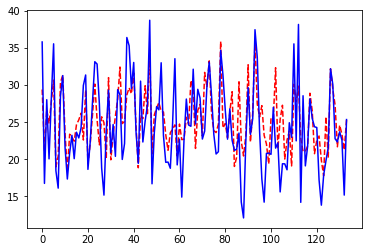

In [12]:
plt.figure()
plt.plot(y_hat.values,'r--',y_test[LABEL].values,'b')

In [13]:
y_all = pd.concat([y_hat, y_test[LABEL], y_test["happier_sigma"]], axis=1)
y_all

predicted_happy  happier_mu  happier_sigma
98         29.411329   35.832882       2.407094
533        21.115561   16.727348       5.789500
235        26.694664   28.033790       3.371890
421        24.819471   20.039478       5.026411
2          27.808790   28.210167       2.402066
99         30.676254   35.585371       2.012107
40         18.951416   18.441178       3.592258
582        20.422300   16.088111       5.706264
286        30.380257   28.529206       3.745952
460        31.350279   31.292538       2.153930
419        23.534330   21.575115       4.875246
659        18.354366   17.318055       6.044900
91         23.370258   20.816252       5.208921
608        22.993362   23.223020       5.638316
596        22.431107   20.067772       3.499354
268        24.665268   23.641136       5.133260
217        25.309483   22.868579       3.701063
404        26.217615   24.233680       5.377356
26         22.591518   29.964168       2.187889
529        29.367437   31.373120       2.131020
479        19.355768   18.623427       5.193378
385        22.081089   22.334702       5.131727
97         26.009287   27.824177       3.067399
68         30.150667   33.166887       2.237961
412        25.325291   32.853904       2.238605
233        21.933155   27.445447       3.305054
651        25.723930   18.788214       4.917566
433        24.932243   15.144414       5.493521
188        20.052637   23.825188       3.199613
378        31.017387   29.318471       3.512212
..               ...         ...            ...
401        25.405485   15.575888       5.455207
232        27.285189   19.380119       5.163268
297        20.016270   19.368628       5.344301
89         22.582787   18.566313       6.081598
573        23.802998   24.923224       6.019001
478        19.088837   22.948523       5.433050
201        30.125647   35.578657       2.217631
228        27.757847   22.474830       5.913607
41         29.864237   38.202983       2.745923
278        22.823723   14.167721       5.515768
11         21.068897   28.570411       3.486314
504        21.043175   19.092069       5.010983
607        21.767630   21.746343       4.851545
643        28.912312   28.152482       2.287253
598        26.559725   25.520545       3.282522
593        20.739679   24.377806       3.304624
29         22.554321   24.281018       6.239836
588        23.129154   17.198043       5.955683
269        19.857058   13.787126       5.274157
237        17.755978   17.840304       6.128548
480        25.729071   19.767796       5.046422
5          20.188576   21.575611       4.970507
427        32.202927   32.222035       2.167078
208        29.455357   30.092540       2.418731
393        27.302935   22.759171       5.455187
303        21.671782   22.325669       5.740031
163        24.586224   23.700262       6.228549
319        23.340075   22.556054       5.113738
597        21.253466   15.147500       5.914717
541        25.289213   25.349926       3.028491

[134 rows x 3 columns]

In [14]:
y_all_sorted = y_all.sort_values("happier_mu",ascending=[True])
y_all_sorted

predicted_happy  happier_mu  happier_sigma
55         20.433399   12.063560       5.021100
269        19.857058   13.787126       5.274157
278        22.823723   14.167721       5.515768
65         23.226038   14.194782       5.442390
104        22.427401   14.215905       5.380826
491        22.642094   14.875958       5.575036
433        24.932243   15.144414       5.493521
597        21.253466   15.147500       5.914717
401        25.405485   15.575888       5.455207
582        20.422300   16.088111       5.706264
220        20.709187   16.673583       6.019981
533        21.115561   16.727348       5.789500
588        23.129154   17.198043       5.955683
503        27.232445   17.307625       5.949658
659        18.354366   17.318055       6.044900
237        17.755978   17.840304       6.128548
40         18.951416   18.441178       3.592258
89         22.582787   18.566313       6.081598
479        19.355768   18.623427       5.193378
375        23.575613   18.770371       6.523414
651        25.723930   18.788214       4.917566
504        21.043175   19.092069       5.010983
561        20.432514   19.225744       6.590370
297        20.016270   19.368628       5.344301
232        27.285189   19.380119       5.163268
645        18.838604   19.428960       4.757468
399        23.312761   19.578080       5.124231
420        21.207575   19.607496       3.681642
480        25.729071   19.767796       5.046422
471        24.812080   19.962046       3.724462
..               ...         ...            ...
378        31.017387   29.318471       3.512212
507        28.131285   29.395832       7.171476
256        26.586746   29.439206       2.407164
441        28.837521   29.533864       3.436180
35         32.753326   29.671036       2.310562
19         29.741001   29.877500       2.286055
26         22.591518   29.964168       2.187889
208        29.455357   30.092540       2.418731
131        25.934267   30.544071       2.173157
460        31.350279   31.292538       2.153930
529        29.367437   31.373120       2.131020
440        24.212072   31.374994       2.186625
406        29.567192   32.156878       2.065765
427        32.202927   32.222035       2.167078
412        25.325291   32.853904       2.238605
388        26.470921   33.024580       2.309432
349        31.643877   33.066553       2.104151
133        33.278538   33.132164       2.581719
68         30.150667   33.166887       2.237961
87         24.633825   33.577144       2.308363
595        27.449394   33.731407       2.196092
258        35.904121   34.705092       2.442714
456        29.639866   35.325198       2.304957
201        30.125647   35.578657       2.217631
99         30.676254   35.585371       2.012107
98         29.411329   35.832882       2.407094
16         28.684038   36.438012       2.553544
451        35.968487   37.494617       2.324155
41         29.864237   38.202983       2.745923
489        34.740669   38.770583       2.563895

[134 rows x 3 columns]

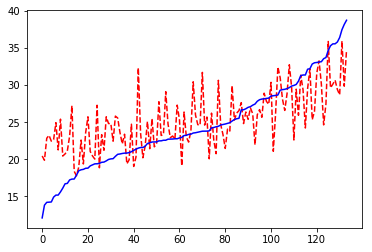

In [15]:
plt.figure()
plt.plot(y_all_sorted["predicted_happy"].values,'r--',y_all_sorted[LABEL].values,'b')

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

Populating the interactive namespace from numpy and matplotlib


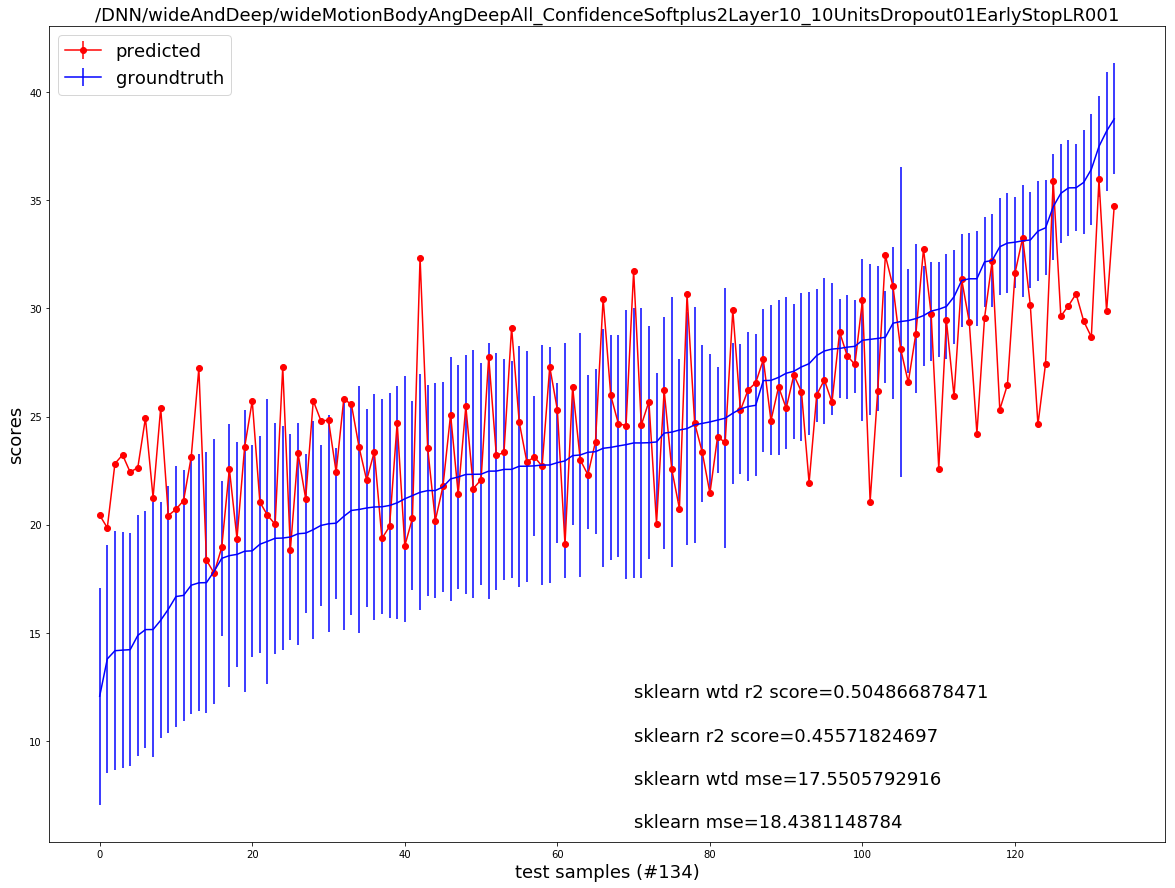

In [17]:
ax =plt.figure()
x = np.arange(0, y_all_sorted["predicted_happy"].size, 1)
plt.errorbar(x,y_all_sorted["predicted_happy"].values,yerr=0,fmt='r-o',label="predicted")
plt.errorbar(x,y_all_sorted[LABEL].values,yerr=y_all_sorted["happier_sigma"],fmt='b',label="groundtruth")
plt.title(model_dir_name,fontsize=18)
plt.xlabel('test samples (#'+str(y_test[LABEL].size)+')',fontsize=18)
plt.ylabel('scores',fontsize=18)
pylab.legend(loc='upper left', fontsize=18)
plt.text(70,12, 'sklearn wtd r2 score='+str(r2_score_wtd), fontsize=18)
plt.text(70,10, 'sklearn r2 score='+str(r2_score), fontsize=18)
plt.text(70,8, 'sklearn wtd mse='+str(score_sklearn_wtd), fontsize=18)
plt.text(70,6, 'sklearn mse='+str(score_sklearn), fontsize=18)
plt.show()
fig_name = model_dir_name + "/testPrediction.pdf"
#ax.savefig(fig_name) 

In [18]:
#sq_error = (y_predicted - np.array(y_test[LABEL].values).reshape(y_predicted.shape))**2

In [19]:
#np.sort(np.array(y_test[LABEL].values).reshape(y_predicted.shape),axis=0)

In [34]:
mean_features = abs(X_test_all[FEATURES].mean()*0.0);
PARAM_ID = 8;
PARAM_NAME = FEATURES[PARAM_ID];
param_range = np.arange(X_train_all[PARAM_NAME].min(),X_train_all[PARAM_NAME].max(),0.1)

In [36]:
wt_vals = np.array([1,1,1]); # wts
ffp_type = 2;
for s in param_range:
    if(s==X_train_all[PARAM_NAME].min()): 
        mean_vals = np.copy(mean_features.values)
        mean_vals = np.append(mean_vals, ffp_type) # ffp
        mean_vals = np.append(mean_vals, wt_vals)
        mean_vals[PARAM_ID] = s;
        X_param_test = mean_vals
    else:
        mean_vals2 = np.copy(mean_features.values)
        mean_vals2 = np.append(mean_vals2, ffp_type)
        mean_vals2 = np.append(mean_vals2, wt_vals)
        mean_vals2[PARAM_ID] = s;
        X_param_test = np.append(X_param_test, mean_vals2,axis=0)
X_param_test = X_param_test.reshape(param_range.size,len(FEATURESALL_WTS))
X_param_test_df = pd.DataFrame(X_param_test, columns = FEATURESALL_WTS)
X_param_test_df["FFPType"] =X_param_test_df["FFPType"].astype(int64) # fixing dtype for int variable..

In [37]:
def get_input_fn_predict(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL_WTS}),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [38]:
predictions_param_range = regressor.predict_scores(input_fn=get_input_fn_predict(X_param_test_df, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted_param = list(itertools.islice(predictions_param_range,X_param_test_df["FFPType"].size))

INFO:tensorflow:Restoring parameters from /DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-1804


In [63]:
sortedScores[["happier_mu", "sadder_mu","angrier_mu", "more-afraid_mu"]].min()

happier_mu        12.063560
sadder_mu         11.986546
angrier_mu        13.135535
more-afraid_mu    11.284580
dtype: float64

Populating the interactive namespace from numpy and matplotlib


C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


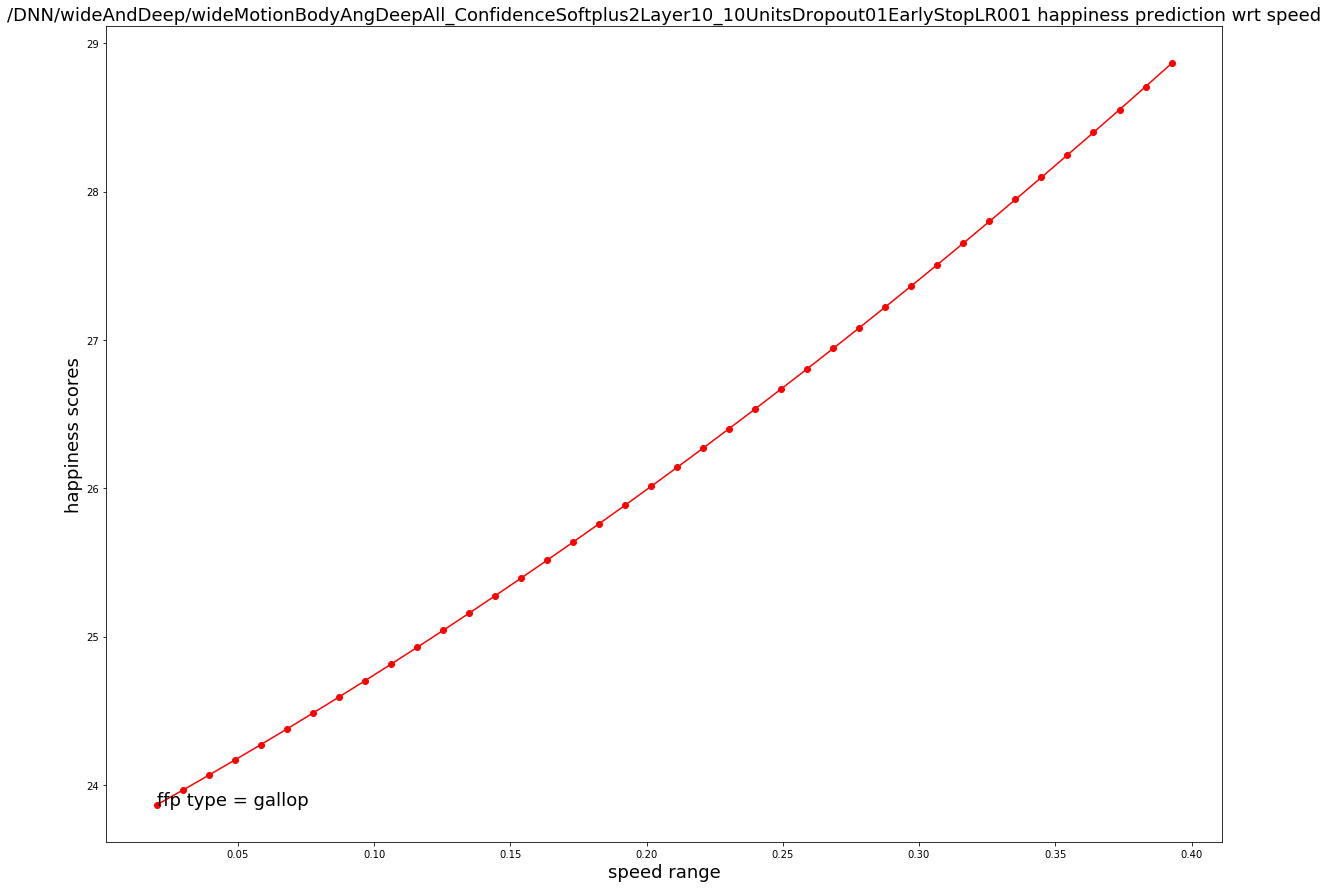

In [39]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = param_range*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean()#param_range
plt.errorbar(x,y_predicted_param,yerr=0,fmt='r-o',label="predicted")
plt.title(model_dir_name +' happiness prediction wrt '+ PARAM_NAME,fontsize=18)
plt.xlabel(PARAM_NAME +' range',fontsize=18)
plt.ylabel('happiness scores',fontsize=18)
#plt.text(X_train_all[PARAM_NAME].min(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
plt.text(X_train_all[PARAM_NAME].min()*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
plt.show()
fig_name = model_dir_name + "/happinessVs"+ PARAM_NAME+"Curve_"+ FFP_LABELS[ffp_type] +"FFP.pdf"
#ax.savefig(fig_name) 

In [65]:
save_name = model_dir_name + "/happy_"+ PARAM_NAME+"_"+ str(ffp_type) +"FFP.txt" 
x_scaled = param_range#*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean()
count = 0
f = open(save_name, 'w')
for d in y_predicted_param:
    f.write('%lf %lf\n' % (x_scaled[count], d))
    count = count+1
f.close()

In [42]:
mean_features = abs(X_test_all[FEATURES].mean()*0.0);
PARAM_ID = 10;
PARAM_NAME = FEATURESALL[PARAM_ID];
param_range = np.arange(X_train_all[PARAM_NAME].min(),X_train_all[PARAM_NAME].max()+1,1)

wt_vals = np.array([1,1,1]); # wts
for s in param_range:
    if(s==X_train_all[PARAM_NAME].min()): 
        mean_vals = np.copy(mean_features.values)
        mean_vals = np.append(mean_vals, s) # ffp
        mean_vals = np.append(mean_vals, wt_vals)
        X_param_test = mean_vals
    else:
        mean_vals2 = np.copy(mean_features.values)
        mean_vals2 = np.append(mean_vals2, s)
        mean_vals2 = np.append(mean_vals2, wt_vals)
        X_param_test = np.append(X_param_test, mean_vals2,axis=0)
X_param_test = X_param_test.reshape(param_range.size,len(FEATURESALL_WTS))
X_param_test_df = pd.DataFrame(X_param_test, columns = FEATURESALL_WTS)
X_param_test_df["FFPType"] =X_param_test_df["FFPType"].astype(int64) # fixing dtype for int variable..

In [45]:
predictions_param_range = regressor.predict_scores(input_fn=get_input_fn_predict(X_param_test_df, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted_param = list(itertools.islice(predictions_param_range,X_param_test_df["FFPType"].size))

INFO:tensorflow:Restoring parameters from /DNN/wideAndDeep/wideMotionBodyAngDeepAll_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-1804


Populating the interactive namespace from numpy and matplotlib


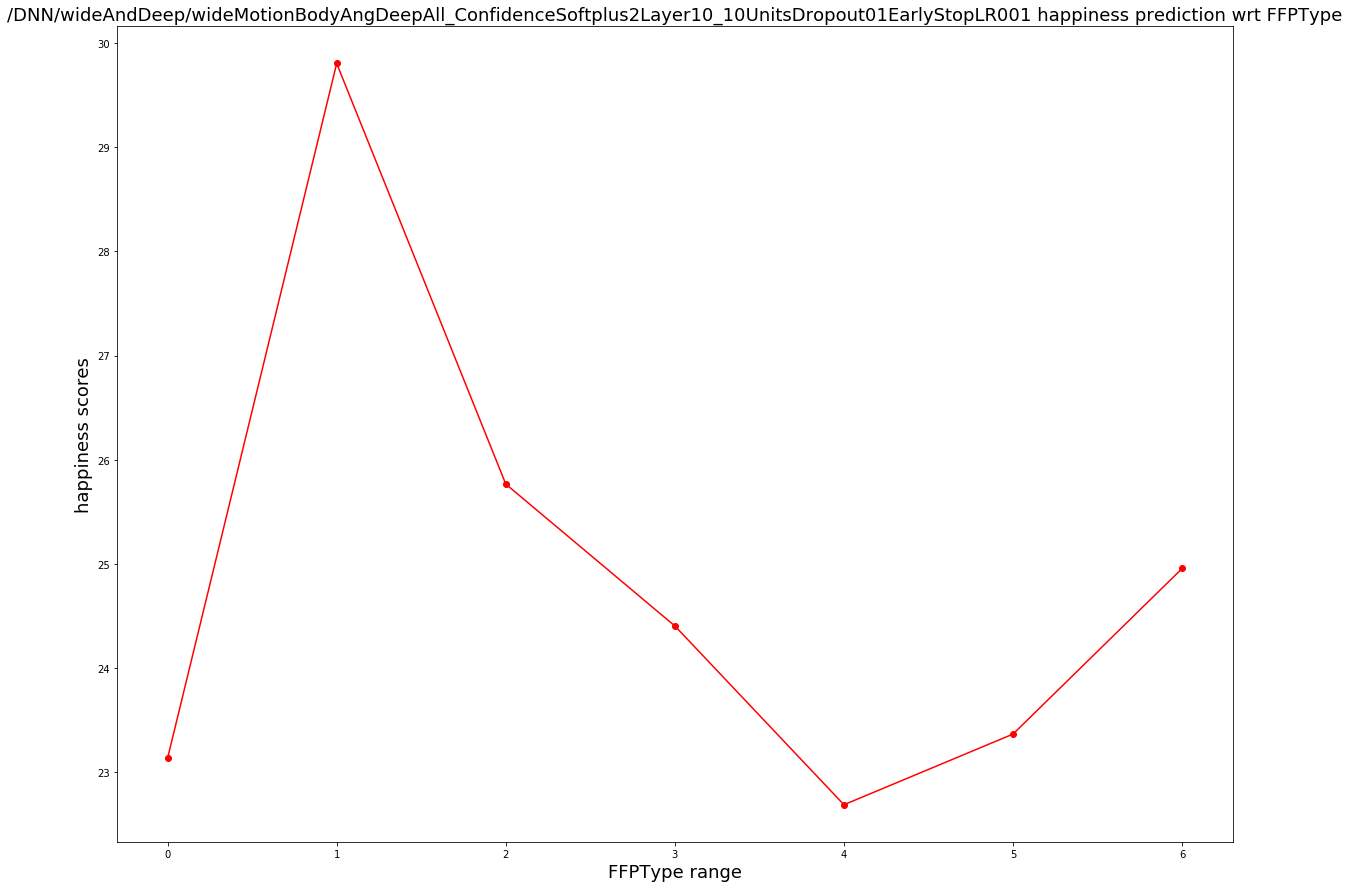

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = param_range
plt.errorbar(x,y_predicted_param,yerr=0,fmt='r-o',label="predicted")
plt.title(model_dir_name +' happiness prediction wrt '+ PARAM_NAME,fontsize=18)
plt.xlabel(PARAM_NAME +' range',fontsize=18)
plt.ylabel('happiness scores',fontsize=18)
#plt.text(X_train_all[PARAM_NAME].min(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
#plt.text(X_train_all[PARAM_NAME].min()*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
plt.show()
fig_name = model_dir_name + "/happinessVs"+ PARAM_NAME+"Curve_"+ FFP_LABELS[ffp_type] +"FFP.pdf"
#ax.savefig(fig_name) 

In [49]:
FFP_LABELS

['walk',
 'trot',
 'gallop',
 'dynamic walk',
 'walk2',
 'walk2LongSwing',
 'walkLongSwing']